# Dimensionality reduction with PCA, t-sne & vae

Let us apply PCA, t-sne & vae dimensionality reduction methods to visualize a large dataset. Therefore, let us reduce the data to 3 dimensions for the sake of simplicity to visualize it.

Dataset: https://www.kaggle.com/jessemostipak/hotel-booking-demand

## Import packages

In [1]:
import pandas as pd

# import data visualization packages
import altair as alt
import matplotlib.pyplot as plt

## Read data

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

* *reservation_status_date* has an object data type. Let us convert it to datetime format and create attributes from that
* *arrival_date_month* has an object data types. Let's change it to numeric value

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Let's check column with null values

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

*country*, *agent*, *compnay*, *children* columns have null values. Let us have a look at the content of the columns

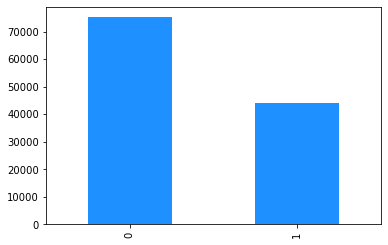

In [7]:
df['is_canceled'].value_counts().plot.bar(color='dodgerblue');

In [8]:
df['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
229.0      1
213.0      1
416.0      1
320.0      1
461.0      1
Name: company, Length: 352, dtype: int64

In [9]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [10]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
AIA        1
MDG        1
NAM        1
NPL        1
GUY        1
Name: country, Length: 177, dtype: int64

In [11]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [12]:
df['children'].isnull().sum()

4

Let us check duplicates in the dataset

In [13]:
df[df.duplicated(keep=False)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,...,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04


In [14]:
df.duplicated().sum()

31994

In [15]:
print("Percentage of duplicated records: ", df.duplicated().sum()*100 / df.shape[0])

Percentage of duplicated records:  26.797889270458164


We got 26.7% of duplicated rows in the dataset. This can be because we do not have any invoice numbers to verify whether the data is duplicated or not. For now, let us just drop duplicated rows.

In [16]:
df['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

We have about 37% of canceled records in the dataset.

## Data cleaning and transformation

Let us prepare our dataset for dimensionality reduction by:
1. Replacing None values with a string *None* in ctagorical attributes such as *country*, *agent*, *company*
2. Drop 4 rows with null values for *children* column
3. Dropping duplicated records
4. Change data type to datetime for *reservation_status_date* and create numerical attributes from that
5. Replace strings to numbers in *arrival_date_month* column
6. Applying one-hot encoding to all categorical variables

Thus, we will get a dataset containing numberical data without any duplicates.

### 1. Dealing with null values

In [17]:
# Fill in null records with 'none' for categorical variables
df['company'].fillna('none', inplace=True)
df['country'].fillna('none', inplace=True)
df['agent'].fillna('none', inplace=True)

In [18]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [19]:
# Drop rows with null children column
df = df[df['children'].notna()]

In [20]:
# Check null values
df.isnull().sum().sum()

0

### 2. Dealing with duplicates

In [21]:
# Drop duplicates
df.drop_duplicates(keep='first', inplace=True)

In [22]:
df.shape

(87392, 32)

In [23]:
# Check duplicates
df.duplicated().sum()

0

### 3. *reservation_status_date* column

In [24]:
# converting the string to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87392 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87392 non-null  object        
 1   is_canceled                     87392 non-null  int64         
 2   lead_time                       87392 non-null  int64         
 3   arrival_date_year               87392 non-null  int64         
 4   arrival_date_month              87392 non-null  object        
 5   arrival_date_week_number        87392 non-null  int64         
 6   arrival_date_day_of_month       87392 non-null  int64         
 7   stays_in_weekend_nights         87392 non-null  int64         
 8   stays_in_week_nights            87392 non-null  int64         
 9   adults                          87392 non-null  int64         
 10  children                        87392 non-null  float64       
 11  b

In [26]:
df['reservation_status_date'].head()

0   2015-07-01
1   2015-07-01
2   2015-07-02
3   2015-07-02
4   2015-07-03
Name: reservation_status_date, dtype: datetime64[ns]

In [27]:
# Engineering new columns based on *reservation_status_date* column
df['reservation_status_year'] = pd.DatetimeIndex(df['reservation_status_date']).year
df['reservation_status_month'] = pd.DatetimeIndex(df['reservation_status_date']).month
df['reservation_status_day'] = pd.DatetimeIndex(df['reservation_status_date']).day

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87392 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87392 non-null  object        
 1   is_canceled                     87392 non-null  int64         
 2   lead_time                       87392 non-null  int64         
 3   arrival_date_year               87392 non-null  int64         
 4   arrival_date_month              87392 non-null  object        
 5   arrival_date_week_number        87392 non-null  int64         
 6   arrival_date_day_of_month       87392 non-null  int64         
 7   stays_in_weekend_nights         87392 non-null  int64         
 8   stays_in_week_nights            87392 non-null  int64         
 9   adults                          87392 non-null  int64         
 10  children                        87392 non-null  float64       
 11  b

In [29]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_year,reservation_status_month,reservation_status_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015,7,3


In [30]:
# Let us drop 'reservation_status_dat''column
df.drop(columns=['reservation_status_date'], inplace=True)

In [31]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_year,reservation_status_month,reservation_status_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,none,0,Transient,0.0,0,0,Check-Out,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,none,0,Transient,0.0,0,0,Check-Out,2015,7,1


### 4. Change to numerical format strings in *arrival_date_month* column

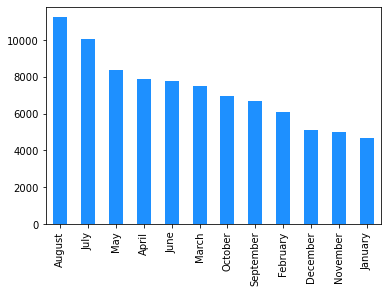

In [32]:
df['arrival_date_month'].value_counts().plot.bar(color='dodgerblue');

In [33]:
df.replace({'arrival_date_month' : { 'January' : 1, 'February' : 2, 'March' : 3, 'April': 4, 
                                     'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9,
                                     'October': 10, 'November': 11, 'December': 12}}, inplace=True)

In [34]:
df['arrival_date_month'].value_counts()

8     11253
7     10057
5      8355
4      7908
6      7765
3      7513
10     6934
9      6690
2      6098
12     5131
11     4995
1      4693
Name: arrival_date_month, dtype: int64

Looks great now! Depending on a goal of an analysis, we cound use this column for one-hot encoding. For the sake of simplicity, I changed to numerical values the records.

### 5. One-hot encoding

In [35]:
# Columns with object data type, which will be used for one-hot encoding
cat_cols = df.select_dtypes('object').columns.tolist()
cat_cols

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'reservation_status']

Let us look at the categorical attributes

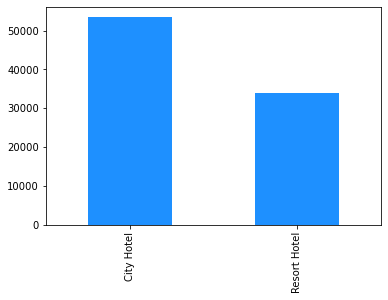

In [36]:
df['hotel'].value_counts().plot.bar(color='dodgerblue');

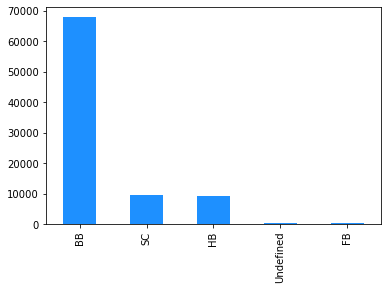

In [37]:
df['meal'].value_counts().plot.bar(color='dodgerblue');

In [38]:
df['country'].value_counts()

PRT    27449
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
AIA        1
MDG        1
NAM        1
NPL        1
GUY        1
Name: country, Length: 178, dtype: int64

In [39]:
df['country'].nunique()

178

*country* column has 178 unique records. Let us drop the column to make one-hote encoding simpler

In [40]:
df.drop(columns=['country'], inplace=True)

In [41]:
df['market_segment'].value_counts()

Online TA        51617
Offline TA/TO    13889
Direct           11803
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Name: market_segment, dtype: int64

In [42]:
df['market_segment'].nunique()

7

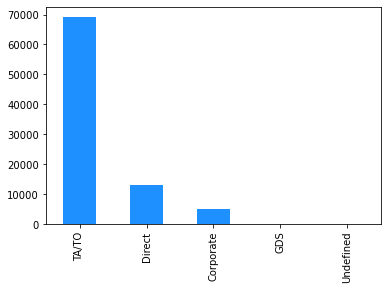

In [43]:
df['distribution_channel'].value_counts().plot.bar(color='dodgerblue');

In [44]:
df['reserved_room_type'].value_counts()

A    56552
D    17398
E     6049
F     2823
G     2052
B      995
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

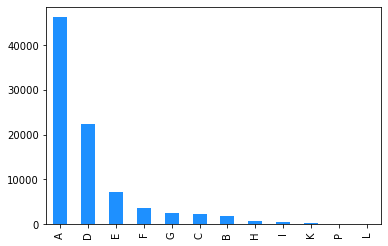

In [45]:
df['assigned_room_type'].value_counts().plot.bar(color='dodgerblue');

In [46]:
df['assigned_room_type'].nunique()

12

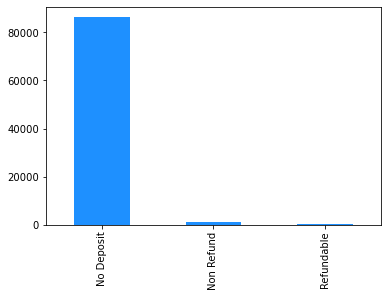

In [47]:
df['deposit_type'].value_counts().plot.bar(color='dodgerblue');

In [48]:
df['agent'].value_counts()

9.0      28758
240.0    13028
none     12191
14.0      3348
7.0       3300
         ...  
346.0        1
337.0        1
333.0        1
165.0        1
90.0         1
Name: agent, Length: 334, dtype: int64

In [49]:
df['agent'].nunique()

334

*agent* column has 334 unique records. Let us drop the column to make one-hote encoding simpler

In [50]:
df.drop(columns=['agent'], inplace=True)

In [51]:
df['company'].value_counts()

none     82133
40.0       851
223.0      503
45.0       238
153.0      206
         ...  
132.0        1
393.0        1
386.0        1
140.0        1
6.0          1
Name: company, Length: 353, dtype: int64

In [52]:
df['company'].nunique()

353

*company* column has 353 unique records. Let us drop the column to make one-hote encoding simpler

In [53]:
df.drop(columns=['company'], inplace=True)

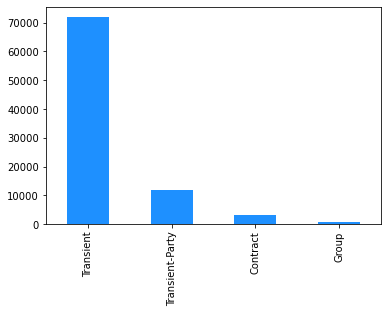

In [54]:
df['customer_type'].value_counts().plot.bar(color='dodgerblue');

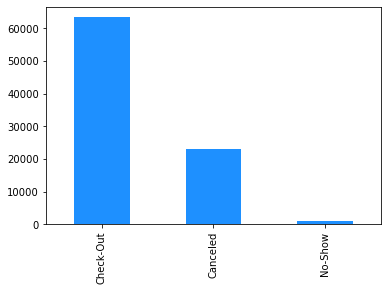

In [55]:
df['reservation_status'].value_counts().plot.bar(color='dodgerblue');

Depending on goals of analysis and insights we are planning to get, we may consider dropping/keeping attributes. However, because we are planning to practice dimensionality reduction techniques, let us keep some of the attributes to make the practice easier.

In [56]:
# let us check categorical attributes again before running one-hot encoding
cat_cols = df.select_dtypes('object').columns.tolist()
cat_cols

['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [57]:
# Apply one-hot encoding
# Code source: https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
df_dummies = pd.get_dummies(df, columns = cat_cols)

In [58]:
df_dummies.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,0,1,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,0,1,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,0,1,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,0,1,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,1,0,0,0,0,1,0,0,1,0


In [59]:
len(df_dummies.columns.tolist())

73

We got 73 attributes with numerical values. Let us use them for playing with dimensionality reduction methods.

In [60]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87392 entries, 0 to 119389
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87392 non-null  int64  
 1   lead_time                       87392 non-null  int64  
 2   arrival_date_year               87392 non-null  int64  
 3   arrival_date_month              87392 non-null  int64  
 4   arrival_date_week_number        87392 non-null  int64  
 5   arrival_date_day_of_month       87392 non-null  int64  
 6   stays_in_weekend_nights         87392 non-null  int64  
 7   stays_in_week_nights            87392 non-null  int64  
 8   adults                          87392 non-null  int64  
 9   children                        87392 non-null  float64
 10  babies                          87392 non-null  int64  
 11  is_repeated_guest               87392 non-null  int64  
 12  previous_cancellations         

In [61]:
df_X = df_dummies.copy()
df_X.drop(columns=['is_canceled'], inplace=True)

In [62]:
df_y = df_dummies[['is_canceled']]

In [63]:
df_X.shape

(87392, 72)

In [64]:
df_y.shape

(87392, 1)

## Dimensionality reduction techniques

I am planning to apply the following dimensionality reduction methods:
1. PCA
2. t-sne
3. vae

In [65]:
from sklearn import decomposition, manifold
from cvae import cvae
import math
import numpy as np

In [66]:
sample_size = 0.1
sample_idx = np.random.choice(df_X.shape[0],\
                              math.ceil(df_X.shape[0]*sample_size), replace=False)

In [70]:
len(sample_idx)

8740

In [68]:
dimred_methods = {
        #Decomposition
        'pca':{'method': decomposition.PCA(n_components=3, random_state=17)},  
        #Manifold Learning
        't-sne':{'method': manifold.TSNE(n_components=3, random_state=17)},
        #Variational Autoencoders
        'vae':{'method': cvae.CompressionVAE(df_X.values,\
                                             dim_latent=3, tb_logging=False)}, 
    }

Total amount of data:  78652
Input feature dimension:  72
Calculating normalisation factors.
Normalisation factors calculated.
Total amount of data:  8740
Creating model.
Model created.
Setting up loss.
Loss set up.
Setting up session.
Session set up.
Trying to restore saved checkpoints from /Users/aigerimshopenova/Desktop/Blog/12_dimensionality_reduction/temp ... No checkpoint found.
No model found to restore. Initialising new model.


In [71]:
for method_name in dimred_methods.keys():
    if method_name != 'vae':
        lowdim_data = dimred_methods[method_name]['method'].\
                        fit_transform(df_X.values[sample_idx])
    else:
        fitted_model = dimred_methods[method_name]['method'].train(num_steps=1000)
        lowdim_data = fitted_model.embed(df_X.values[sample_idx])
        dimred_methods[method_name]['fitted'] = fitted_model
    dimred_methods[method_name]['lowdim'] = lowdim_data

Starting queues.
Reader threads started.
step 0; epoch 0.00 - loss = 29.776, test_loss = 41.246, lr = 0.00100, (0.032 sec/step)
Storing checkpoint to /Users/aigerimshopenova/Desktop/Blog/12_dimensionality_reduction/temp ... Done.
step 50; epoch 0.04 - loss = 40.299, test_loss = 38.829, lr = 0.00100, (0.008 sec/step)
step 100; epoch 0.08 - loss = 23.935, test_loss = 38.601, lr = 0.00100, (0.008 sec/step)
step 150; epoch 0.12 - loss = 36.228, test_loss = 38.303, lr = 0.00100, (0.008 sec/step)
step 200; epoch 0.16 - loss = 46.651, test_loss = 38.263, lr = 0.00100, (0.008 sec/step)
step 250; epoch 0.20 - loss = 29.365, test_loss = 38.246, lr = 0.00100, (0.008 sec/step)
step 300; epoch 0.24 - loss = 27.808, test_loss = 38.237, lr = 0.00100, (0.008 sec/step)
step 350; epoch 0.28 - loss = 28.914, test_loss = 38.202, lr = 0.00100, (0.009 sec/step)
step 400; epoch 0.33 - loss = 31.433, test_loss = 38.270, lr = 0.00100, (0.009 sec/step)
step 450; epoch 0.37 - loss = 35.509, test_loss = 38.213, l

In [72]:
y_names = {0:'Not canceled', 1:'Canceled'}

In [73]:
dimred_methods

{'pca': {'method': PCA(copy=True, iterated_power='auto', n_components=3, random_state=17,
      svd_solver='auto', tol=0.0, whiten=False),
  'lowdim': array([[-76.03505627, -51.26980479, -31.75312184],
         [-69.32906167,  45.42735413,   8.60500768],
         [ -2.05589156, -43.5533154 , -15.24836286],
         ...,
         [-79.43904068,  22.54025282, -20.61205326],
         [-78.39595648, -42.10029078,  -0.64577331],
         [-74.56103808,  -7.24504403,   2.3950322 ]])},
 't-sne': {'method': TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
       method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
       n_components=3, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
       perplexity=30.0, random_state=17, verbose=0),
  'lowdim': array([[ -5.3514094,   8.75399  , -11.911892 ],
         [  9.7570715,  -9.594332 ,  -5.92115  ],
         [ -9.496554 ,   5.4153395,  -0.8942109],
         ...,
         [  3.7185378,  -5.0264435,  -8.0339

In [74]:
def plot_3dim_decomposition(Z, y_labels, y_names):
    if len(y_names) > 2:
        cmap = 'plasma_r'
    else:
        cmap = 'viridis'
    fig, axs = plt.subplots(1, 3, figsize = (16,4))
    fig.subplots_adjust(hspace=0, wspace=0.3)
    scatter = axs[0].scatter(Z[:,0], Z[:,1],\
                             c=y_labels, alpha=0.5, cmap=cmap)
    legend = axs[0].legend(*scatter.legend_elements(), loc='best')
    for n in y_names.keys(): 
        legend.get_texts()[n].set_text(y_names[n])
    axs[0].set_xlabel('x', fontsize = 12)
    axs[0].set_ylabel('y', fontsize = 12)
    scatter = axs[1].scatter(Z[:,1], Z[:,2],\
                   c=y_labels, alpha=0.5, cmap=cmap)
    legend = axs[1].legend(*scatter.legend_elements(), loc='best')
    for n in y_names.keys(): 
        legend.get_texts()[n].set_text(y_names[n])
    axs[1].set_xlabel('y', fontsize = 12)
    axs[1].set_ylabel('z', fontsize = 12)
    axs[2].scatter(Z[:,0], Z[:,2],\
                   c=y_labels, alpha=0.5, cmap=cmap)
    legend = axs[2].legend(*scatter.legend_elements(), loc='best')
    for n in y_names.keys(): 
        legend.get_texts()[n].set_text(y_names[n])
    axs[2].set_xlabel('x', fontsize = 12)
    axs[2].set_ylabel('z', fontsize = 12)
    plt.show()

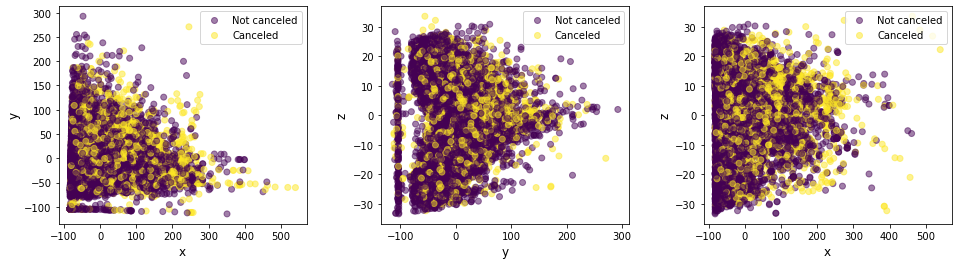

In [76]:
plot_3dim_decomposition(dimred_methods['pca']['lowdim'],\
                        df_y.values[sample_idx], y_names)

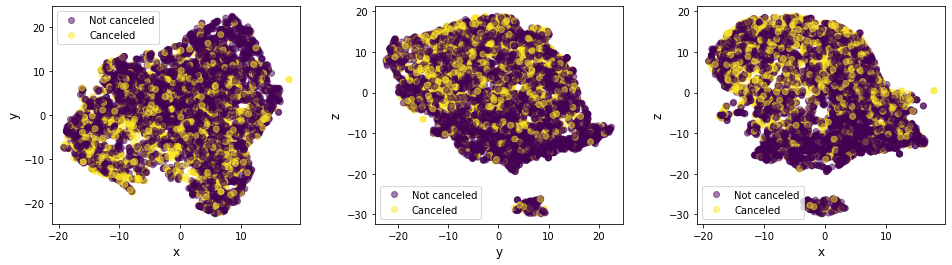

In [77]:
plot_3dim_decomposition(dimred_methods['t-sne']['lowdim'],\
                        df_y.values[sample_idx], y_names)

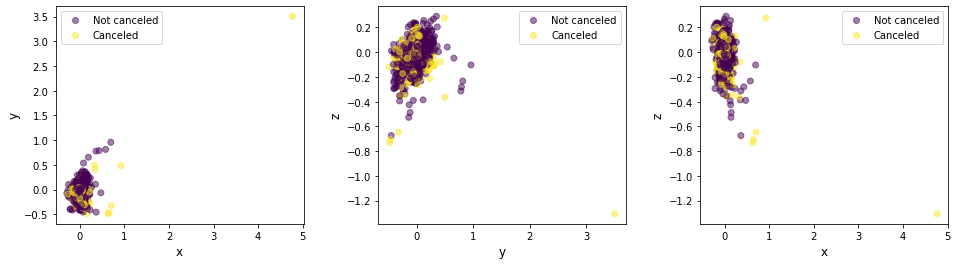

In [78]:
plot_3dim_decomposition(dimred_methods['vae']['lowdim'],
                        df_y.values[sample_idx], y_names)